# Main Notebook

In [1]:
# To reload modules on update without restarting the kernel
%load_ext autoreload
%autoreload 2

# All packages used for visualization, embedding, results, ...
from tools import *

In [2]:
corpus = pdfToCleanText()
e = Embedding()
e.loadCorpus(corpus)
e.loadLabel()

Vocabulary loaded : self.label
Labels loaded : self.y


In [ ]:
useAPI = False
if useAPI:
    e.loadKey("KEY") # https://beta.openai.com/docs/api-reference/authentication
    e.computeGPT()
else:
    import pandas as pd
    e.embedding["GPT"] = pd.read_csv("data/GPTEmbedding.csv", index_col=0)

In [22]:
e.plotEmbedding(embeddingType="GPT", dim=2, reduction="TSNE")

In [ ]:
scores = []
import numpy as np
sizes = np.arange(0.01, 0.3, 0.01)
for i in sizes:
    s = e.computeSVC(embeddingType="GPT", testSize=i)
    scores.append(s)
import plotly.express as px


In [48]:
fig = px.line(x=sizes, y=scores, labels={"x": "Test Size", "y": "Accuracy"})
fig.update_layout(title="SVC Accuracy by Test Size")
fig.show()

In [49]:
e.computeSVC(embeddingType="GPT", testSize=0.13)

SVC score : 0.45161290322580644
SVC model computed : self.model["SVC"]
SVC prediction computed : self.y_pred["SVC"]


0.45161290322580644

In [54]:
e.plotEmbedding(embeddingType="GPT", dim=3, reduction="TSNE", y ="SVC")

In [59]:
import pandas as pd

In [68]:
df = pd.DataFrame(columns=["word", "y", "yPredSVC"])
df["word"] = e.y.keys()
df["y"] = e.y.values()
df["yPredSVC"] = e.yPred["SVC"]

In [70]:
df[df["y"] != df["yPredSVC"]].head(40)

,word,y,yPredSVC
0,ai,AnythingAI,Organization or Person
1,regulation,Regulation,Requirement
2,article,Law text,Organization or Person
6,member,EU Country,Organization or Person
7,directive,Law,Requirement
12,union law,Law text,Regulator
14,high-risk ai,High risk AI System,Risk
17,remote biometric identification systems,AI System Approach,AI Domain
18,artificial intelligence,AnythingAI,AI System Development Process
19,such systems,AI System,AI System Development Process


In [136]:
e.computeHDBSCAN(embeddingType="GPT", min_cluster_size=5, min_samples=2)

HDBSCAN model computed : self.model["HDBSCAN"]
HDBSCAN prediction computed : self.y_pred["HDBSCAN"]


In [138]:
e.plotEmbedding(embeddingType="GPT", dim=2, reduction="ACP", y ="HDBSCAN")

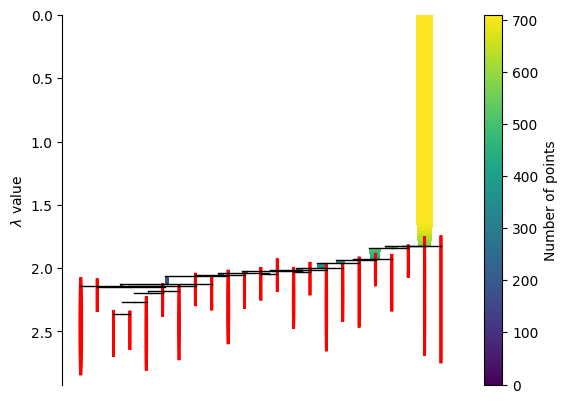

In [140]:
e.plotHDBSCANDendrogram(condensed=True)

In [141]:
df = pd.DataFrame(columns=["word", "y", "yPredHDBSCAN"])
df["word"] = e.y.keys()
df["y"] = e.y.values()
df["yPredHDBSCAN"] = e.yPred["HDBSCAN"]

In [142]:
for cluster in np.unique(e.yPred["HDBSCAN"]):
    print("Cluster", cluster)
    print(" | ".join(df[df["yPredHDBSCAN"] == cluster]["word"].values))
    print("\n")

Cluster cluster_0
criminal offences | different criminal offences | criminal matters | criminal proceedings | potential criminal offence | past criminal behaviour


Cluster cluster_1
conformity assessment | third-party conformity assessment | relevant conformity assessment procedure | conformity assessment procedure | conformity assessment body | initial conformity assessment | third-party conformity assessment body pursuant | new conformity assessment | new conformity assessment procedure | conformity assessment bodies | performs third-party conformity assessment activities | conformity


Cluster cluster_10
such data | data subjects | means data | such information | high quality data | such research | high data quality | quality datasets | high-quality data | validation data | validation dataset | individual data


Cluster cluster_11
training | learning approaches focus | learning | learning approaches | high quality training | learning process


Cluster cluster_12
human oversight | h